<a href="https://colab.research.google.com/github/WittmannF/DL-plagiarism-detector/blob/master/Feature_Extraction_in_Sentences.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import torch
import transformers as ppb
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Source: https://wtamu.edu/~cbaird/sq/category/chemistry/
BIOLOGY_QUESTIONS = """Are gender traits completely a result of societal expectations?
Are there any parts of the human body that get oxygen directly from the air and not from the blood?
Are there nuclear reactions going on in our bodies?
Can humans ever directly see a photon?
Can I turn my cat into a diamond?
Do blind people dream in visual images?
Do Kirlian photographs show the soul of an organism?
Do koalas eat honey like other bears?
Do poppy seeds contain narcotics?
Does the human body contain minerals?
How can the heart be strong enough to pump blood up your legs against gravity?
How can we differentiate so many different foods if we can only taste four flavors on our tongue: sweet, bitter, sour, and salty?
How can we unlock the 90% of our brain that we never use?
How did doctors create my belly button?
How did evolution ever lead ostriches to hide their head in the sand when an enemy approaches?
How do I turn on more parts of my brain and get smarter?
How do nerves control every organ and function in the body?
How do trees give earth all its oxygen?
How does the outer layer of skin cells on my finger detect when I am touching an object?
How long before genetic sequencing is able to tell us exactly how our children will look and act?
How long does it take our eyes to fully adapt to darkness?
How much water can a camel store in its hump?
How strong does a non-toxic odor have to be before it damages your sense of smell?
Is human blood ever any color other than red?
Is ionizing radiation always harmful?
Is it completely random whether a baby is a boy or a girl?
What are the five senses of the human body?
What chemicals can make human tissue regenerate in seconds?
What is it about a full moon that makes people do crazy things and commit crimes?
What is it about red that makes bulls so angry?
When did humans stop evolving?
When do birds use their teeth?
Where in my body is the original cell from which I was formed?
Why are bats blind?
Why are human brains the biggest?
Why are red, yellow, and blue the primary colors in painting but computer screens use red, green, and blue?
Why are veins blue?
Why can only certain parts of the tongue taste sweet flavors? Is there an evolutionary benefit to this?
Why can you boil a frog without it jumping out to safety if you raise the temperature slowly?
Why can't color blind people see any colors?
Why did evolution create a chicken that lays so many unfertilized eggs when that is so wasteful?
Why do camera flashes make your eyes turn red?
Why do humans have an appendix even though it is unnecessary?
Why do my fingers absorb water and become wrinkled?
Why does chewing gum take seven years to digest?
Why does every cell in our body contain DNA?
Why does evolution always lead to more advanced species?
Why don't dogs sweat?
Why don't I burst cells in my rear when I sit down?
Why don't our eyeballs fill up with water when we swim?
Why don't trees freeze and burst in the winter like cold pipes?
Why have humans evolved to be taller over the last three hundred years?
Why will a mother bird abandon its chick if touched by a human?"""

BIOLOGY_QUESTIONS=BIOLOGY_QUESTIONS.split('\n')

# Source: https://wtamu.edu/~cbaird/sq/category/physics/
PHYSICS_QUESTIONS = """As light from a star spreads out and weakens, do gaps form between the photons?
Can a fire have a shadow?
Can air make shadows?
Can gold be created from other elements?
Can light bend around corners?
Can momentum be hidden to human eyes like how kinetic energy can be hidden as heat?
Can one bit of light bounce off another bit of light?
Can radio antennas emit visible light?
Can sound waves generate heat?
Can the decay half-life of a radioactive material be changed?
Can you go fast enough to get enough mass to become a black hole?
Can you make a shock wave of light by breaking the light barrier just like supersonic airplanes break the sound barrier?
Can you make a sunset in a cup of milk?
Could electronic devices charge themselves without being plugged into an electricity source?
Could scientists perfectly simulate the entire universe in a computer, down to the last atom?
Do atoms ever actually touch each other?
Do flames contain plasma?
Does a source of electricity ever run out of electrons?
Does an atom have a color?
Does an electron in an atom move at all?
Does the negative mass of antimatter mean that it's gravitationally repelled from stars?
Does time go faster at the top of a building compared to the bottom?
How bad would a person's injuries be if an elevator's cables snapped at the 100th floor so that the elevator fell to the bottom?
How can a clear object be transparent and visible at the same time?
How can a material at a certain temperature have all of its molecules at the same energy?
How can an electron leap between atomic levels without passing through all the space in between?
How can it be so hard to drag rubber across smooth glass if friction is caused by surface roughness?
How can we travel to the past?
How did Archimedes use mirrors to burn up invaders' ships?
How do airplanes fly upside down if it's the shape of the wings that make them fly?
How do free energy machines work?
How do levers create energy if the conservation of energy does not allow energy to be created?
How do projectors project the color black?
How do scientists cool objects to absolute zero?
How do tractor beams work?
How do you focus regular light to make it a laser beam?
How do you make a one-photon-thick beam of light?
How does a microwave oven heat up food even though it emits no thermal radiation?
How does a penny left on the track derail a train?
How does a photon accelerate to light speed so quickly?
How does quantum theory allow a rock to turn suddenly into a duck?
How does sound going slower in water make it hard to talk to someone underwater?
How high does a building have to be for a penny dropped from the top to kill a person on the ground?
How is a magnetic field just an electric field with relativity applied?
How long can you use a cell phone before getting a brain tumor?
If I hammered and flattened a penny enough, could I cover the entire earth with it?
If I'm on an elevator that breaks loose and plummets down the shaft, can I avoid harm by jumping at the last second?
Is it possible to create magnetic waves?
Is light a particle or a wave?
Is metal a good heat shield?
Is the reason that nothing can go faster than light because we have not tried hard enough?
Is there any difference between antimatter, dark matter, dark energy, and degenerate matter?
Light has no mass so it also has no energy according to Einstein, but how can sunlight warm the earth without energy?
Since gravity is unlimited, can we use it as an infinite energy source?
What are some other ways to save energy in a car besides turning off the air conditioner and rolling down the windows?
What did Schrodinger's Cat experiment prove?
What is the shape of an electron?
What is the speed of dark?
What is the speed of electricity?
What is the speed of gravity?
What is the strongest magnetic field possible? Is there a limit?
What keeps a bicycle balanced?
What makes heat rise?
What makes radioactive atoms get old so quickly and decay?
What makes the light waves in laser light parallel?
What psychological effect makes notes on a piano that are an octave apart sound the same?
What stops a piece of paper from being folded more than seven times?
What would happen if you drove your car close to the speed of light and turned on the headlights?
When does a light beam have only a single frequency?
When I bump one end of a long metal bar, the other end instantaneously moves. Can I use this to send messages faster than light?
When I sit by a campfire, how does its hot air heat me?
When I step out of the shower, what makes the tile floor so much colder than the bathroom mat?
Why are all metals magnetic?
Why are sound waves invisible?
Why are the microwaves in a microwave oven tuned to water?
Why are there only six fundamental colors: red, orange, yellow, green, blue, and violet?
Why can't flat lenses focus light?
Why do diamonds last forever?
Why do mirrors flip left to right and not up to down?
Why do quantum effects only happen on the atomic scale?
Why does a rainbow contain a pure spread of spectral colors?
Why does a rainbow exist only in a narrow band?
Why does air friction affect a car's gas mileage?
Why does lightning push electricity through air, but common batteries do not?
Why does my room get dark when I turn the lights off even if my window is shut?
Why does water make a shirt darker?
Why doesn't light carry momentum?
Why doesn't my laptop emit radiation?
Why don't atoms collapse if they are mostly empty space?
Why don't electrons in the atom enter the nucleus?
Why don't I feel the miles of air above me that are crushing me down?
Why don't scientists use fractal concepts more considering that fractals are everywhere?
Why is a 12-volt household battery harmless, but the shock from a 12-volt car battery will kill you?
Why is light pure energy?
Why is physics scale invariant?
Why is the centrifugal force talked about so much if it's not real?
Why is the lowest temperature called absolute zero if it's relative to the frame of reference?
Why is time frozen from light's perspective?
Why was color invented by humans?
Why were electrons chosen to be negatively charged? Wouldn't it make more sense to call electrons positively charged because when they move they make electricity?
Why will a delivery truck filled with birds sitting on its floor be heavier than a truck with the same birds flying around inside."""
PHYSICS_QUESTIONS=PHYSICS_QUESTIONS.split('\n')

df=pd.DataFrame(BIOLOGY_QUESTIONS+PHYSICS_QUESTIONS, columns=['Questions'])
df['Type']=[1]*len(BIOLOGY_QUESTIONS)+[0]*len(PHYSICS_QUESTIONS)
df['Questions']=df['Questions'].str.lower()
df.tail()

,Questions,Type
149,why is the lowest temperature called absolute ...,0
150,why is time frozen from light's perspective?,0
151,why was color invented by humans?,0
152,why were electrons chosen to be negatively cha...,0
153,why will a delivery truck filled with birds si...,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Questions  154 non-null    object
 1   Type       154 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.5+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Type,154.0,0.344156,0.476642,0.0,0.0,0.0,1.0,1.0


In [ ]:
df['Type'].value_counts()

0    101
1     53
Name: Type, dtype: int64

In [ ]:
batch_1 = df['Questions']

In [ ]:
# For DistilBERT:
model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')

## Want BERT instead of distilBERT? Uncomment the following line:
#model_class, tokenizer_class, pretrained_weights = (ppb.BertModel, ppb.BertTokenizer, 'bert-base-uncased')

# Load pretrained model/tokenizer
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)

In [ ]:
tokenizer.encode('Hello world')

[101, 7592, 2088, 102]

In [ ]:
tokenized = batch_1.apply((lambda x: tokenizer.encode(x, add_special_tokens=True)))

In [ ]:
max_len = 0
for i in tokenized.values:
    if len(i) > max_len:
        max_len = len(i)

padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized.values])

In [ ]:
np.array(padded).shape

(154, 32)

In [ ]:
attention_mask = np.where(padded != 0, 1, 0)
attention_mask.shape

(154, 32)

In [ ]:
input_ids = torch.tensor(padded)  
attention_mask = torch.tensor(attention_mask)

with torch.no_grad():
    last_hidden_states = model(input_ids, attention_mask=attention_mask)

In [ ]:
features = last_hidden_states[0][:,0,:].numpy()

In [ ]:
features.shape

(154, 768)

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
TSNE()

TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
     method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
     n_components=2, n_iter=1000, n_iter_without_progress=300, n_jobs=None,
     perplexity=30.0, random_state=None, verbose=0)

In [ ]:
tse=TSNE(n_components=2, metric='cosine')
X_embedded = tse.fit_transform(features)
X_embedded.shape

(154, 2)

In [ ]:
import matplotlib.pyplot as plt

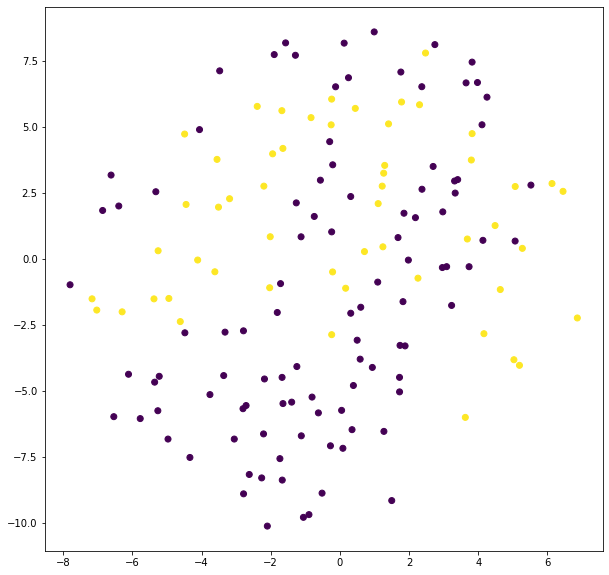

In [ ]:
plt.figure(figsize=(10, 10))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=df['Type'].values)
#for i, (x, y) in enumerate(X_embedded):
#    plt.text(x, y, i)

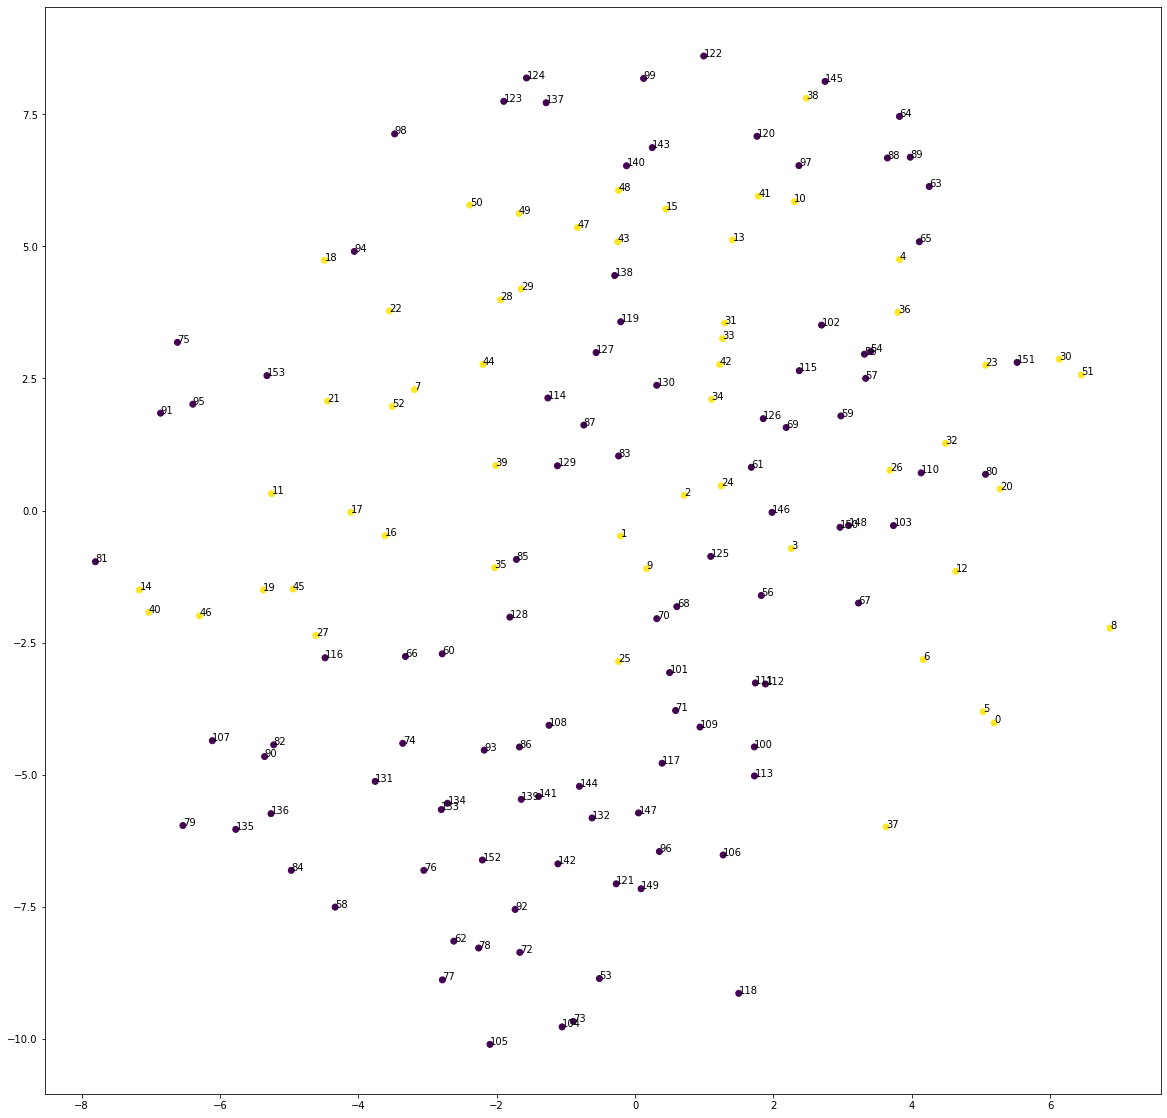

In [ ]:
plt.figure(figsize=(20, 20))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=df['Type'].values)
for i, (x, y) in enumerate(X_embedded):
    plt.text(x, y, i)

In [ ]:
df['Questions'].iloc[27]

'what chemicals can make human tissue regenerate in seconds?'

In [ ]:
df['Questions'].iloc[116]

'what makes radioactive atoms get old so quickly and decay?'

In [ ]:
from sklearn.neighbors import NearestNeighbors
nn = NearestNeighbors(2, metric='cosine', algorithm='brute')

In [ ]:
nn.fit(features)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                 radius=1.0)

In [ ]:
dists, idxs = nn.kneighbors(features)
#print(f'The closest N of {IDX} is {idx}, distance value: {dists}')

In [ ]:
top_similar=pd.DataFrame(zip(range(len(idxs[:, 1])), idxs[:, 1], dists[:, 1]), columns=['index', 'closest_index', 'distance'])
top_similar['question'] = top_similar['index'].apply(lambda x: df['Questions'].values[x])
top_similar['closest_question'] = top_similar['closest_index'].apply(lambda x: df['Questions'].values[x])
top_similar=top_similar.sort_values(by='distance')
top_similar.head(10)

,index,closest_index,distance,question,closest_question
112,112,111,0.005781,what is the speed of gravity?,what is the speed of electricity?
111,111,112,0.005781,what is the speed of electricity?,what is the speed of gravity?
54,54,55,0.008642,can a fire have a shadow?,can air make shadows?
55,55,54,0.008642,can air make shadows?,can a fire have a shadow?
57,57,55,0.009278,can light bend around corners?,can air make shadows?
89,89,88,0.009970,how do you make a one-photon-thick beam of light?,how do you focus regular light to make it a la...
88,88,89,0.009970,how do you focus regular light to make it a la...,how do you make a one-photon-thick beam of light?
109,109,112,0.010508,what is the shape of an electron?,what is the speed of gravity?
133,133,134,0.010607,why does a rainbow contain a pure spread of sp...,why does a rainbow exist only in a narrow band?
134,134,133,0.010607,why does a rainbow exist only in a narrow band?,why does a rainbow contain a pure spread of sp...


In [ ]:
for row in top_similar.head(20).iterrows():
    print(row[1]['question'])
    print(row[1]['closest_question'])
    print('='*80)

what is the speed of gravity?
what is the speed of electricity?
what is the speed of electricity?
what is the speed of gravity?
can a fire have a shadow?
can air make shadows?
can air make shadows?
can a fire have a shadow?
can light bend around corners?
can air make shadows?
how do you make a one-photon-thick beam of light?
how do you focus regular light to make it a laser beam?
how do you focus regular light to make it a laser beam?
how do you make a one-photon-thick beam of light?
what is the shape of an electron?
what is the speed of gravity?
why does a rainbow contain a pure spread of spectral colors?
why does a rainbow exist only in a narrow band?
why does a rainbow exist only in a narrow band?
why does a rainbow contain a pure spread of spectral colors?
why is light pure energy?
why are sound waves invisible?
why are sound waves invisible?
why is light pure energy?
how do free energy machines work?
how do tractor beams work?
how do tractor beams work?
how do free energy machines

In [ ]:
!pip install sentence_transformers

     |████████████████████████████████| 71kB 3.3MB/s 
     |████████████████████████████████| 1.3MB 9.3MB/s 
     |████████████████████████████████| 2.9MB 35.8MB/s 
     |████████████████████████████████| 1.1MB 54.4MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-0.3.9-cp36-none-any.whl size=101034 sha256=1bf9bfe6720961cb61df2798df5f74156ab368e65f8be73aa12bbefa39341164
  Stored in directory: /root/.cache/pip/wheels/fc/89/43/f2f5bc00b03ef9724b0f6254a97eaf159a4c4ddc024b33e07a
Successfully built sentence-transformers
  Found existing installation: tokenizers 0.9.4
    Uninstalling tokenizers-0.9.4:
      Successfully uninstalled tokenizers-0.9.4
  Found existing installation: transformers 4.0.1
    Uninstalling transformers-4.0.1:
      Successfully uninstalled transformers-4.0.1


In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('distilbert-base-nli-stsb-mean-tokens')

#Our sentences we like to encode
sentences = ['This framework generates embeddings for each input sentence',
    'Sentences are passed as a list of string.',
    'The quick brown fox jumps over the lazy dog.']

#Sentences are encoded by calling model.encode()
embeddings = model.encode(sentences)

#Print the embeddings
for sentence, embedding in zip(sentences, embeddings):
    print("Sentence:", sentence)
    print("Embedding Shape:", embedding.shape)
    print(embedding[:5])
    print("")

Sentence: This framework generates embeddings for each input sentence
Embedding Shape: (768,)
[-0.21486165  0.39572316  0.4690867   0.13617757  0.00691137]

Sentence: Sentences are passed as a list of string.
Embedding Shape: (768,)
[-0.44001725 -0.28488496  0.23363848  0.55378336  0.20757279]

Sentence: The quick brown fox jumps over the lazy dog.
Embedding Shape: (768,)
[-0.29504803 -0.24928896 -0.02407152 -0.07039125 -0.29811573]



In [ ]:
sentences = df['Questions'].values
embeddings = model.encode(sentences)

In [ ]:
embeddings.shape

(154, 768)

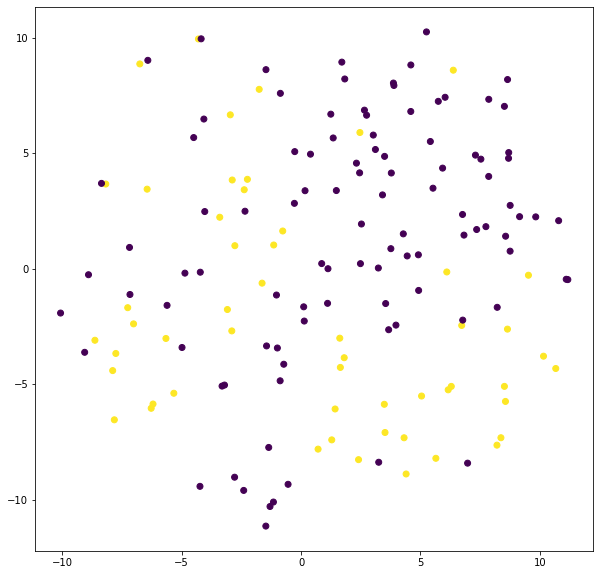

In [ ]:
tse=TSNE(n_components=2, metric='cosine')
X_embedded = tse.fit_transform(embeddings)
X_embedded.shape
plt.figure(figsize=(10, 10))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=df['Type'].values)

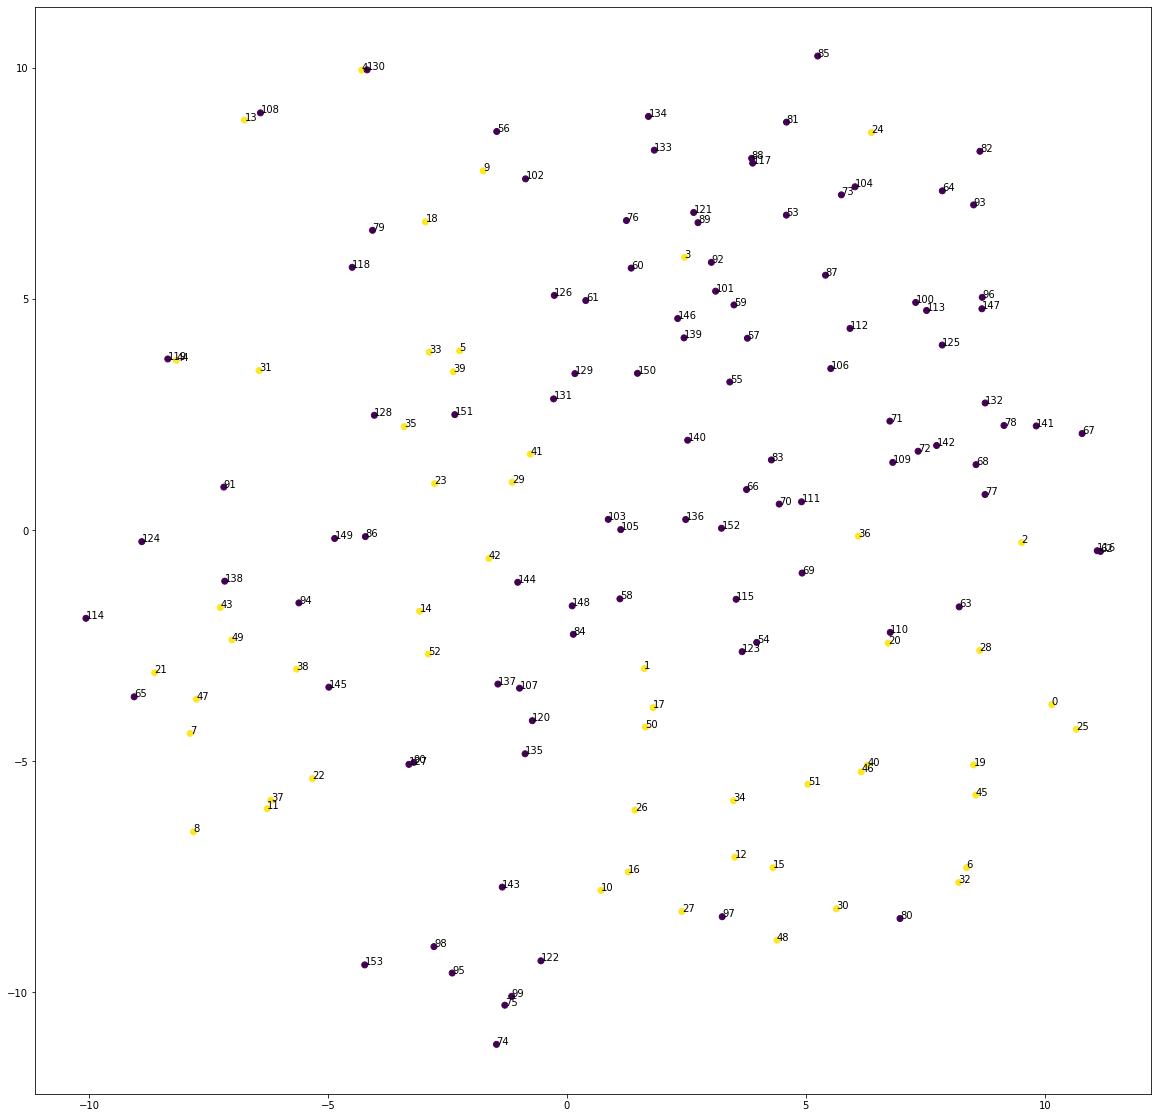

In [ ]:
plt.figure(figsize=(20, 20))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=df['Type'].values)
for i, (x, y) in enumerate(X_embedded):
    plt.text(x, y, i)

In [ ]:
df.iloc[110].values

array(['what is the speed of dark?', 0], dtype=object)

In [ ]:
df.iloc[20].values

array(['how long does it take our eyes to fully adapt to darkness?', 1],
      dtype=object)

In [ ]:
df.iloc[37].values

array(['why can only certain parts of the tongue taste sweet flavors? is there an evolutionary benefit to this?',
       1], dtype=object)

In [ ]:
df.iloc[11].values

array(['how can we differentiate so many different foods if we can only taste four flavors on our tongue: sweet, bitter, sour, and salty?',
       1], dtype=object)

In [ ]:
nn = NearestNeighbors(2, metric='cosine', algorithm='brute')
nn.fit(embeddings)
dists, idxs = nn.kneighbors(embeddings)
top_similar=pd.DataFrame(zip(range(len(idxs[:, 1])), idxs[:, 1], dists[:, 1]), columns=['index', 'closest_index', 'distance'])
top_similar['question'] = top_similar['index'].apply(lambda x: df['Questions'].values[x])
top_similar['closest_question'] = top_similar['closest_index'].apply(lambda x: df['Questions'].values[x])
top_similar=top_similar.sort_values(by='distance')
top_similar.head(10)

,index,closest_index,distance,question,closest_question
88,88,117,0.140595,how do you focus regular light to make it a la...,what makes the light waves in laser light para...
117,117,88,0.140595,what makes the light waves in laser light para...,how do you focus regular light to make it a la...
109,109,72,0.170704,what is the shape of an electron?,does an electron in an atom move at all?
72,72,109,0.170704,does an electron in an atom move at all?,what is the shape of an electron?
92,92,3,0.180072,how does a photon accelerate to light speed so...,can humans ever directly see a photon?
3,3,92,0.180072,can humans ever directly see a photon?,how does a photon accelerate to light speed so...
111,111,70,0.216219,what is the speed of electricity?,does a source of electricity ever run out of e...
70,70,111,0.216219,does a source of electricity ever run out of e...,what is the speed of electricity?
139,139,146,0.220792,why doesn't light carry momentum?,why is light pure energy?
146,146,139,0.220792,why is light pure energy?,why doesn't light carry momentum?


In [ ]:
for row in top_similar.head(20).iterrows():
    print(row[1]['question'])
    print(row[1]['closest_question'])
    print('='*80)

how do you focus regular light to make it a laser beam?
what makes the light waves in laser light parallel?
what makes the light waves in laser light parallel?
how do you focus regular light to make it a laser beam?
what is the shape of an electron?
does an electron in an atom move at all?
does an electron in an atom move at all?
what is the shape of an electron?
how does a photon accelerate to light speed so quickly?
can humans ever directly see a photon?
can humans ever directly see a photon?
how does a photon accelerate to light speed so quickly?
what is the speed of electricity?
does a source of electricity ever run out of electrons?
does a source of electricity ever run out of electrons?
what is the speed of electricity?
why doesn't light carry momentum?
why is light pure energy?
why is light pure energy?
why doesn't light carry momentum?
why don't electrons in the atom enter the nucleus?
does an electron in an atom move at all?
when does a light beam have only a single frequency?

### References
- https://www.sbert.net/index.html
- http://mlexplained.com/2019/01/07/paper-dissected-bert-pre-training-of-deep-bidirectional-transformers-for-language-understanding-explained/
- https://colab.research.google.com/github/jalammar/jalammar.github.io/blob/master/notebooks/bert/